# Load Tracks

In [1]:
import sys
sys.path.insert(0, '/home/student.unimelb.edu.au/shorte1/Documents/TINT')

In [2]:
# Core
import datetime
import os
import glob
import tempfile
import pickle
import copy

# Analysis
import numpy as np
import pandas as pd
import xarray as xr

# Plotting
import matplotlib.pyplot as plt
import matplotlib as mpl

# Debugging
import pdb, traceback
# %load_ext line_profiler

# Radar Tools
import pyart
import tint
# import tint.animate
# from tint.visualisation import animate

import CPOL_func as cf
import caine_func as caf
import analysis

# Convenience functions
%load_ext autoreload
%autoreload 1
%aimport CPOL_func
%aimport caine_func
%aimport tint.visualisation.figures
%aimport tint.visualisation.animate
%aimport tint.visualisation.horizontal_helpers
%aimport tint.visualisation.vertical_helpers
%aimport tint.tracks
%aimport tint.objects
%aimport tint.grid_utils
%aimport tint.steiner
%aimport tint.matching
%aimport tint.rain
%aimport tint.cells
%aimport tint.tracks_helpers
%aimport tint.process_ERA5
%aimport tint.process_WRF

%pdb


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



/home/student.unimelb.edu.au/shorte1/anaconda3/envs/CPOL_analysis/lib/python3.8/site-packages/networkx/readwrite/graphml.py:346: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  (np.int, "int"), (np.int8, "int"),
/home/student.unimelb.edu.au/shorte1/anaconda3/envs/CPOL_analysis/lib/python3.8/site-packages/networkx/readwrite/gexf.py:220: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to us

Automatic pdb calling has been turned ON


In [3]:
base_dir = '/media/shorte1/Ewan\'s Hard Drive/phd/data/CPOL/'
save_dir = '/home/student.unimelb.edu.au/shorte1/Documents/TINT_tracks/'
fig_dir = '/home/student.unimelb.edu.au/shorte1/Documents/TINT_figures/'
ERA5_dir = '/media/shorte1/Ewan\'s Hard Drive/phd/data/era5/'
ERA5_dir += 'pressure-levels/reanalysis/'
WRF_dir = '/media/shorte1/Ewan\'s Hard Drive/phd/data/caine_WRF_data/'

In [4]:
with open(save_dir + '/lin_alt.pkl', 'rb') as f:
    lin_tracks_obj = pickle.load(f)
with open(save_dir + '/thompson_alt.pkl', 'rb') as f:
    thompson_tracks_obj = pickle.load(f)

In [5]:
micro_physics = 'lin'

dates = np.arange(
    np.datetime64('2006-02-08 12:00'), 
    np.datetime64('2006-02-13 10:10'),
    np.timedelta64(10, 'm'))

filenames, start_time, end_time = caf.caine_files_from_datetime_list(
    dates, micro_physics=micro_physics, 
    base_dir=WRF_dir)

tracks_obj  = tint.Tracks(params={
    'AMBIENT': 'WRF', 'AMBIENT_BASE_DIR': WRF_dir + 'lind02/'})

Gathering files.


In [ ]:
for uid_ind in np.arange(1,13).astype(str):
    fig_dir = '/home/student.unimelb.edu.au/shorte1/Documents/TINT_figures'

    params = {
        'uid_ind': uid_ind, 'line_coords': True, 'center_cell': False, 
        'cell_ind': 7, 'winds': True, 'winds_fn': filenames, 
        'direction': 'perpendicular', 'crosshair': True, 'save_dir': fig_dir,
        'line_average': True, 'streamplot': True, 'relative_winds': True,
        'data_fn': 'angles', 'load_line_coords_winds': False, 
        'save_ds': False}

    grids = (
        pyart.io.read_grid(fn, include_fields = ['reflectivity'])
        for fn in filenames)

    tint.visualisation.animate.animate(lin_tracks_obj, grids, params)

Generating frame 2006-02-09T09:00:00.000000000
Interpolating onto line coordinates.
Calculating horizontal winds in new basis.
Adding reflectivity.
Adding stratiform offset.
Adding winds.
Saving data.
Creating new CSV file to store angle data.
Generating frame 2006-02-09T09:10:00.000000000
Interpolating onto line coordinates.
Calculating horizontal winds in new basis.
Adding reflectivity.
Adding stratiform offset.
Adding winds.
Saving data.
Generating frame 2006-02-09T09:20:00.000000000
Interpolating onto line coordinates.
Calculating horizontal winds in new basis.
Adding reflectivity.
Adding stratiform offset.
Adding winds.
Saving data.
Generating frame 2006-02-09T09:30:00.000000000
Interpolating onto line coordinates.
Calculating horizontal winds in new basis.
Adding reflectivity.
Adding stratiform offset.
Adding winds.
Saving data.
Generating frame 2006-02-09T09:40:00.000000000
Interpolating onto line coordinates.
Calculating horizontal winds in new basis.
Adding reflectivity.
Addin

Adding stratiform offset.
Adding winds.
Saving data.
Generating frame 2006-02-09T13:40:00.000000000
Interpolating onto line coordinates.
Calculating horizontal winds in new basis.
Adding reflectivity.
Adding stratiform offset.
Adding winds.
Saving data.
Generating frame 2006-02-09T13:50:00.000000000
Interpolating onto line coordinates.
Calculating horizontal winds in new basis.
Adding reflectivity.
Adding stratiform offset.
Adding winds.
Saving data.
Generating frame 2006-02-09T14:00:00.000000000
Interpolating onto line coordinates.
Calculating horizontal winds in new basis.
Adding reflectivity.
Adding stratiform offset.
Adding winds.
Saving data.
Generating frame 2006-02-09T14:10:00.000000000
Interpolating onto line coordinates.
Calculating horizontal winds in new basis.
Adding reflectivity.
Adding stratiform offset.
Adding winds.
Saving data.
Generating frame 2006-02-09T14:20:00.000000000
Interpolating onto line coordinates.
Calculating horizontal winds in new basis.
Adding reflectiv

Adding stratiform offset.
Adding winds.
Saving data.
Generating frame 2006-02-10T10:10:00.000000000
Interpolating onto line coordinates.
Calculating horizontal winds in new basis.
Adding reflectivity.
Adding stratiform offset.
Adding winds.
Saving data.
Generating frame 2006-02-10T10:20:00.000000000
Interpolating onto line coordinates.
Calculating horizontal winds in new basis.
Adding reflectivity.
Adding stratiform offset.
Adding winds.
Saving data.
Generating frame 2006-02-10T10:30:00.000000000
Interpolating onto line coordinates.
Calculating horizontal winds in new basis.
Adding reflectivity.
Adding stratiform offset.
Adding winds.
Saving data.
Generating frame 2006-02-10T10:40:00.000000000
Interpolating onto line coordinates.
Calculating horizontal winds in new basis.
Adding reflectivity.
Adding stratiform offset.
Adding winds.
Saving data.
Creating GIF - may take a few minutes.
Generating frame 2006-02-11T00:30:00.000000000
Interpolating onto line coordinates.
Calculating horizont

Adding stratiform offset.
Adding winds.
Saving data.
Generating frame 2006-02-11T05:40:00.000000000
Interpolating onto line coordinates.
Calculating horizontal winds in new basis.
Adding reflectivity.
Adding stratiform offset.
Adding winds.
Saving data.
Generating frame 2006-02-11T05:50:00.000000000
Interpolating onto line coordinates.
Calculating horizontal winds in new basis.
Adding reflectivity.
Adding stratiform offset.
Adding winds.
Saving data.
Generating frame 2006-02-11T06:00:00.000000000
Interpolating onto line coordinates.
Calculating horizontal winds in new basis.
Adding reflectivity.
Adding stratiform offset.
Adding winds.
Saving data.
Generating frame 2006-02-11T06:10:00.000000000
Interpolating onto line coordinates.
Calculating horizontal winds in new basis.
Adding reflectivity.
Adding stratiform offset.
Adding winds.
Saving data.
Generating frame 2006-02-11T06:20:00.000000000
Interpolating onto line coordinates.
Calculating horizontal winds in new basis.
Adding reflectiv

Adding stratiform offset.
Adding winds.
Saving data.
Generating frame 2006-02-11T04:50:00.000000000
Interpolating onto line coordinates.
Calculating horizontal winds in new basis.
Adding reflectivity.
Adding stratiform offset.
Adding winds.
Saving data.
Generating frame 2006-02-11T05:00:00.000000000
Interpolating onto line coordinates.
Calculating horizontal winds in new basis.
Adding reflectivity.
Adding stratiform offset.
Adding winds.
Saving data.
Generating frame 2006-02-11T05:10:00.000000000
Interpolating onto line coordinates.
Calculating horizontal winds in new basis.
Adding reflectivity.
Adding stratiform offset.
Adding winds.
Saving data.
Generating frame 2006-02-11T05:20:00.000000000
Interpolating onto line coordinates.
Calculating horizontal winds in new basis.
Adding reflectivity.
Adding stratiform offset.
Adding winds.
Saving data.
Generating frame 2006-02-11T05:30:00.000000000
Interpolating onto line coordinates.
Calculating horizontal winds in new basis.
Adding reflectiv

In [17]:
tint.visualisation.figures.concat_angles(
    '/home/student.unimelb.edu.au/shorte1/Documents/TINT_figures/lin_objects',
    '/home/student.unimelb.edu.au/shorte1/Documents/TINT_figures/lin_angles.csv',
    12)

,time,uid,streamline_angle,w_max,n_angles,n_obs,max_count,stratiform_offset_angle
0,2006-02-09 08:30:00,0,151.25,2.651685,168.0,820.0,10.0,89.419244
1,2006-02-09 08:40:00,0,91.25,5.463759,162.0,738.0,7.0,86.813102
2,2006-02-09 08:50:00,0,163.75,4.478228,90.0,902.0,15.0,155.353923
3,2006-02-09 09:00:00,0,138.75,2.239941,69.0,369.0,6.0,68.035144
4,2006-02-09 09:10:00,0,166.25,1.536123,30.0,1025.0,6.0,151.175068
...,...,...,...,...,...,...,...,...
9,2006-02-13 10:10:00,11,173.75,2.534968,72.0,779.0,27.0,162.513872
10,2006-02-13 10:20:00,11,173.75,1.882085,42.0,738.0,15.0,167.325305
11,2006-02-13 10:30:00,11,171.25,1.716105,30.0,656.0,6.0,167.377685
12,2006-02-13 10:40:00,11,138.75,5.096160,81.0,451.0,6.0,157.806306


In [22]:
lin_angles = pd.read_csv(fig_dir + '/lin_angles.csv').dropna()
thompson_angles = pd.read_csv(fig_dir + '/thompson_angles.csv').dropna()

In [23]:
# Combined
angle_diff_t, X_t, names = tint.visualisation.figures.get_angle_props(
    thompson_angles, thompson_tracks_obj)
angle_diff_l, X_l, names = tint.visualisation.figures.get_angle_props(
    lin_angles, lin_tracks_obj)
angle_diff = np.concatenate([angle_diff_t, angle_diff_l])
X = np.concatenate([X_t, X_l])
sl_angles_t = thompson_angles['streamline_angle'].values
so_angles_t = thompson_angles['stratiform_offset_angle'].values
sl_angles_l = lin_angles['streamline_angle'].values
so_angles_l = lin_angles['stratiform_offset_angle'].values
sl_angles = np.concatenate([sl_angles_t, sl_angles_l])
so_angles = np.concatenate([so_angles_t, so_angles_l])

In [15]:
# Single
angle_diff, X, names = tint.visualisation.figures.get_angle_props(
    thompson_angles, thompson_tracks_obj)
# angle_diff, X, names = tint.visualisation.figures.get_angle_props(
#     lin_angles, lin_tracks_obj)

In [24]:
from sklearn import tree
clf = tree.DecisionTreeRegressor(min_samples_split=.25)
clf.fit(X, angle_diff)

DecisionTreeRegressor(min_samples_split=0.25)

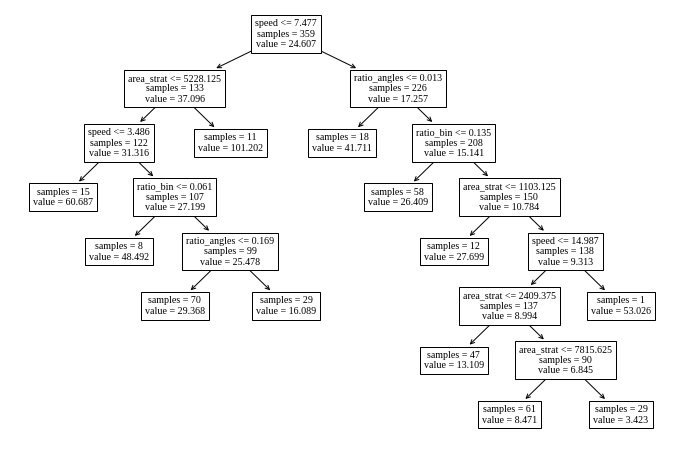

In [25]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)
tree.plot_tree(
    clf, max_depth=10, ax=ax, feature_names=names, fontsize=10, 
    label='all', impurity=False)
fig.savefig(fig_dir + 'tree_combined.pdf', facecolor='w', format='pdf')

In [26]:
[
        w_max, ratio_angles, ratio_bin, ratio_border_conv, 
        ratio_border_strat, area_conv, area_strat, eccentricity, 
        speed] = [X[:,i] for i in range(X.shape[1])]

In [31]:
# Combined criteria
cond1 = (speed <= 7.477) & (area_strat <= 5228.125) & (speed > 3.486) & (ratio_bin > 0.061) & (ratio_angles > 0.169)
cond2 = (speed > 7.477) & (ratio_angles > 0.013) & (ratio_bin > 0.135) & (area_strat > 1103)
cond = cond1 | cond2

In [27]:
# Combined criteria
cond2 = ratio_angles > 0.1
cond3 = ratio_bin > 0.1
cond4 = area_conv > 2000
cond4 = area_strat > 2000
cond = cond2 & cond3 & cond4

In [53]:
# Combined criteria
cond1 = speed > 7.5
cond2 = ratio_angles > 0.013
cond3 = ratio_bin > 0.135
cond5 = np.array(area_strat) > 2409
cond6 = speed <= 14.987
cond7 = np.array(ratio_border_conv) <= 0.037
cond8 = np.array(area_conv) > 325.0
# cond = cond1 & cond2 & cond3 & cond5 # & cond7
cond = cond1 & cond2 & cond3 & cond5 & cond6

In [569]:
# Thompson split criteria
cond1 = speed > 7.568
cond2 = ratio_angles > 0.013
cond3 = ratio_bin > 0.082
cond4 = speed <= 14.987
cond5 = np.array(area_strat) > 1650
cond6 = np.array(ratio_border_conv) <= 0.037
cond7 = np.array(area_conv) > 325.0
cond = cond1 & cond2 & cond3 & cond4 # & cond5 & cond7

In [524]:
cond1a = (ratio_angles <= 0.021)
cond1b = (ratio_angles > 0.021) & (ratio_bin <= 0.213)
cond1 = (speed <= 7.568) & (ratio_angles > 0.001) & (ratio_bin > 0.055) & (speed > 4.93) & (cond1a | cond1b)
cond2a = (speed <= 10.09)
cond2b = (speed > 10.09) & (ratio_bin > 0.137)
cond2 = (speed > 7.568) & (ratio_angles > 0.013) & (ratio_bin > 0.082) & (speed <= 14.987) & (cond2a | cond2b)
cond = cond1 | cond2

In [374]:
# Lin split criteria
cond1 = speed > 0
cond2 = ratio_angles > 0.011
cond3 = ratio_bin > 0.127
cond4 = w_max > 1
cond = cond1 & cond2 & cond3 & cond4

In [386]:
# Lin split criteria
cond1 = (ratio_bin > 0.221) & (speed > 6.943) & (eccentricity > 0.679)
cond2 = (
    (ratio_bin <= 0.221) & (ratio_angles > 0.011) & (w_max > 2.243)
    & (
        ((ratio_bin > 0.116) & (speed > 3.676)) 
        | ((ratio_bin <= 0.113) & (ratio_bin > 0.049))))
cond = cond1 | cond2

In [534]:
len(cond[cond==True])

51

(0.12276354191822786, 0.31859736964950425)

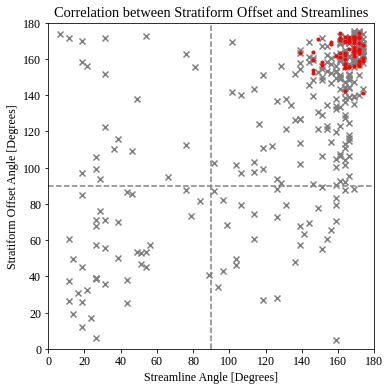

In [30]:
tint.visualisation.figures.angle_correlation(
    sl_angles, so_angles, cond, fig_dir + 'combined_angle_correlation_crude.png')
pearsonr(sl_angles[cond], so_angles[cond])

In [29]:
from scipy.stats.stats import pearsonr 


In [15]:
np.rad2deg(np.arctan2(5.5,-30))

169.6111421845304

In [18]:
from skimage.transform import radon
from skimage.io import imread
from skimage.color import rgb2gray, rgba2rgb

In [25]:
test = (image == 0).astype(int)

In [29]:
filename = filenames[36]
grid = pyart.io.read_grid(filename, include_fields = ['reflectivity'])
fig_dir = '/home/student.unimelb.edu.au/shorte1/Documents/TINT_figures'

params = {
    'uid_ind': '1', 'line_coords': False, 'center_cell': False, 
    'cell_ind': 4, 'winds': False, 'winds_fn': filename,
    'crosshair': True, 'save_dir': None, 'legend': False}

tint.visualisation.figures.object(tracks_obj, grid, params=params)

IndexError: list index out of range

> /tmp/ipykernel_21199/4030395361.py(1)<module>()
----> 1 filename = filenames[36]
      2 grid = pyart.io.read_grid(filename, include_fields = ['reflectivity'])
      3 fig_dir = '/home/student.unimelb.edu.au/shorte1/Documents/TINT_figures'
      4 
      5 params = {

ipdb> q
